#**HW 3: Convolutional Neural Networks**

In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the same dataset that we used in the previous exercise, the Fashion Minst. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
Load the Fashion Minst dataset as we did in the previous homework. As you already know Fashion Minst dataset contains grayscale images, and the task consists of classifying the images in the ten classes. As we did in HW2 we have to divide the dataset in training test and validation set. Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in ggreyscaleimage is just one). Therefore we [tf.expand_dims](https://) dim to do that. Finaly, as we did in HW2 we have to normalize the input data.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data()) #The dataset is already divede in test and training..

#Normalize the data
pixel_means = X_train_full.mean(axis = 0)
pixel_stds = X_test.std(axis = 0)

X_train_full = (X_train_full - pixel_means) / pixel_stds
X_test = (X_test - pixel_means) / pixel_stds 

#Add one dimension to manage the channel
X_train_full=tf.expand_dims(X_train_full, 3) 
X_test=tf.expand_dims(X_test,3)

#Extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


4423680/4422102 [==============================] - 0s 0us/step


###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* the output layer,  the same we used in HW2 (that use softmax function)
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [0]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])


Print the model summary

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the sharing parameters techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model

In [6]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
430/430 [==============================] - 22s 51ms/step - loss: 0.7385 - accuracy: 0.7591 - val_loss: 0.5290 - val_accuracy: 0.8140
Epoch 2/10
430/430 [==============================] - 22s 51ms/step - loss: 0.4818 - accuracy: 0.8344 - val_loss: 0.4390 - val_accuracy: 0.8524
Epoch 3/10
430/430 [==============================] - 22s 50ms/step - loss: 0.4297 - accuracy: 0.8523 - val_loss: 0.4090 - val_accuracy: 0.8582
Epoch 4/10
430/430 [==============================] - 22s 51ms/step - loss: 0.3986 - accuracy: 0.8634 - val_loss: 0.3843 - val_accuracy: 0.8724
Epoch 5/10
430/430 [==============================] - 22s 51ms/step - loss: 0.3780 - accuracy: 0.8693 - val_loss: 0.3711 - val_accuracy: 0.8726
Epoch 6/10
430/430 [==============================] - 22s 51ms/step - loss: 0.3633 - accuracy: 0.8730 - val_loss: 0.3742 - val_accuracy: 0.8724
Epoch 7/10
430/430 [==============================] - 22s 51ms/step - loss: 0.3517 - accuracy: 0.8774 - val_loss: 0.3638 - val_accuracy:

Plot the loss and the accuracy trends for the training and validation set, Then compute the result on the test set.

313/313 - 2s - loss: 0.3623 - accuracy: 0.8721
accuracy: 87.21%


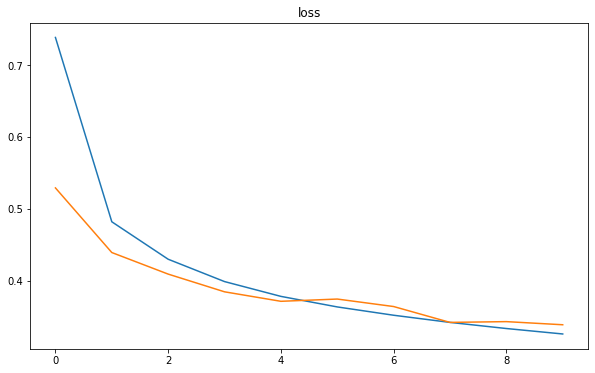

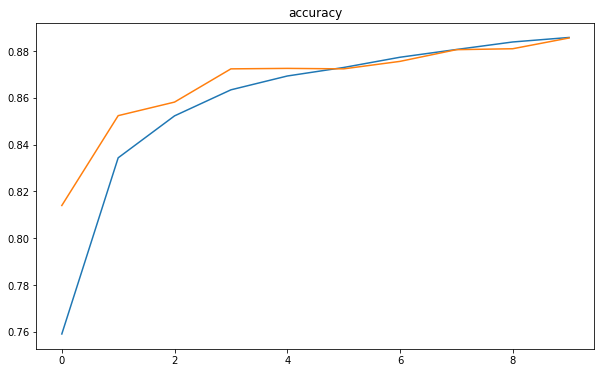

In [7]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'])
  plt.plot(history.epoch,history.history['val_loss'])
  plt.title('loss')

def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'])
  plt.plot(history.epoch,history.history['val_accuracy'])
  plt.title('accuracy')

plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

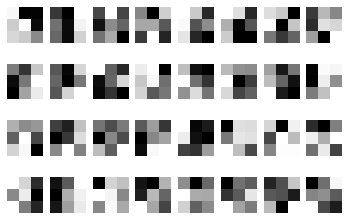

In [10]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

## Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**To Complete**: Your task is to do some reparametrizations of the previous exercise's network and compare the results. At least one of them should have an improvement in the test set result (generalization) than the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells in the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation'](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

In [26]:
best_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[5,5], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
best_model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])

best_history = best_model.fit(X_train, y_train, epochs=20, batch_size=128,
                    validation_data=(X_valid, y_valid))



Epoch 1/20
430/430 [==============================] - 55s 129ms/step - loss: 0.6007 - accuracy: 0.7848 - val_loss: 0.3742 - val_accuracy: 0.8692
Epoch 2/20
430/430 [==============================] - 56s 130ms/step - loss: 0.3921 - accuracy: 0.8616 - val_loss: 0.3220 - val_accuracy: 0.8882
Epoch 3/20
430/430 [==============================] - 55s 129ms/step - loss: 0.3491 - accuracy: 0.8759 - val_loss: 0.3054 - val_accuracy: 0.8892
Epoch 4/20
430/430 [==============================] - 55s 128ms/step - loss: 0.3253 - accuracy: 0.8838 - val_loss: 0.2803 - val_accuracy: 0.9020
Epoch 5/20
430/430 [==============================] - 55s 128ms/step - loss: 0.3090 - accuracy: 0.8885 - val_loss: 0.2742 - val_accuracy: 0.8976
Epoch 6/20
430/430 [==============================] - 55s 127ms/step - loss: 0.2945 - accuracy: 0.8943 - val_loss: 0.2667 - val_accuracy: 0.9068
Epoch 7/20
430/430 [==============================] - 55s 127ms/step - loss: 0.2805 - accuracy: 0.8988 - val_loss: 0.2533 - val_ac

313/313 - 3s - loss: 0.2482 - accuracy: 0.9156
accuracy: 91.56%


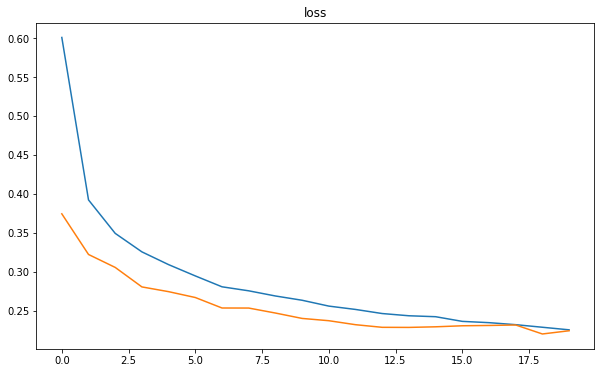

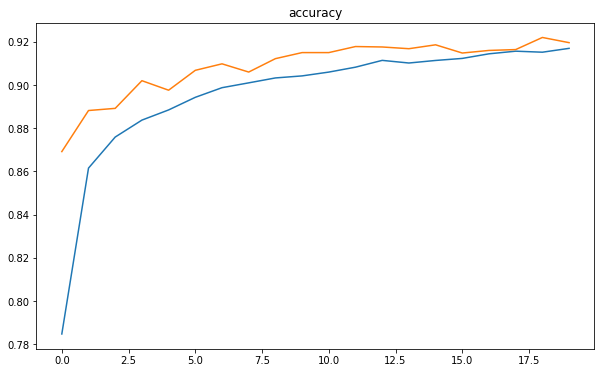

In [27]:
plot_loss(best_history)

plot_accuracy(best_history)

scores = best_model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (best_model.metrics_names[1], scores[1]*100))

### Test results discussion
The best model that I found is composed of:
*   Two 2D convolutional layer, the first with kernel size 5x5 and the second with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
*   two Max Pooling layer (2D) of size 2x2
*   two Dropout layer with 0.25 as a fraction of the input units to drop.
*   a Flatten layer
*   the output layer that use softmax function and with 10 units

The achieved accuracy in the test set is 91.56%

Discussion: the test performance is good and there aren't big differences between the training performance and the test performance so i think the obtained model is a good model. 

Besides, I also tested other models initially by changing the parameters one at a time:
* I set the number of epochs to 15 but the loss on training was less than the loss on validation from epoch 10 and finally accuracy in the test was 87.57% and in the original model was 87.21%
* I used a 2D convolutional layer with kernel size 3x3 and 32 output filters/features that use Tanh activation function and there were no significant differences, in fact accuracy in the test was 86.58% and in the original model was 87.21%
*   I set the batch_size to 64 and the achieved accuracy in the test was 88.11%
*   I used a 2D convolutional layer with kernel size 5x5 and 32 output filters/features that use ReLu activation function and the accuracy in the test was 87.57%
*   I used adagrad as optimizer but the accuracy in the test was 85.88% so after I used adam optimizer and the achieved accuracy in the test was approximately 90% but there was overfitting from epoch 2
*   I added two more convolutional layers and two layers of maxpooling and the accuracy in the test was 86.12%

Discussion:
starting from the observation of the results obtained by changing one parameter at a time I decided to use adam as an optimizer and to add a dropout layer with 0.5 as a fraction of the inputs units to drop to regularize. The achieved accuracy was 89.48%. I added in this model another convolutional layer, another maxpool layer and another dropout layer and the accuracy was 89.68%. After I modified one at a time the parameters like epochs, batch_size, fraction of the inputs units to drop, kernel_size and i obtained the best model described above.